In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

w[0]: 0.393906  b: -0.031804


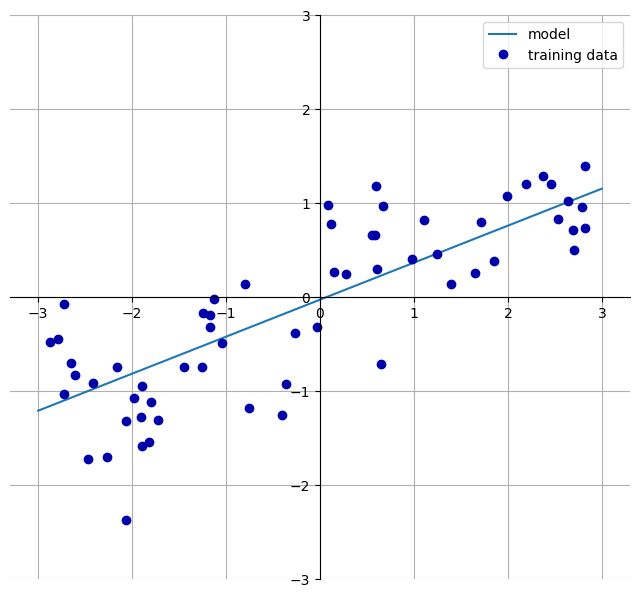

In [ ]:
mglearn.plots.plot_linear_regression_wave()

# y = w[0] * x[0] + b
# w[0] = slope, b = y-axis offset  

In [6]:
# Ordinary Least Square or the OLS model
# Minimize MSE between predictions and the true regression targets, y, on the training set.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {: .2f}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03


In [13]:
print("Training set score: {: .2f}".format(lr.score(X_train, y_train)))
print("Test set score: {: .2f}".format(lr.score(X_test, y_test)))

Training set score:  0.67
Test set score:  0.66


In [18]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print("Training set score: {: .2f}".format(lr.score(X_train, y_train)))
print("Test set score: {: .2f}".format(lr.score(X_test, y_test)))

Training set score:  0.95
Test set score:  0.61


In [20]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {: .2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {: .2f}".format(ridge.score(X_test, y_test)))

Training set score:  0.89
Test set score:  0.75


In [21]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {: .2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {: .2f}".format(ridge10.score(X_test, y_test)))

Training set score:  0.79
Test set score:  0.64


In [22]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {: .2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {: .2f}".format(ridge01.score(X_test, y_test)))

Training set score:  0.93
Test set score:  0.77


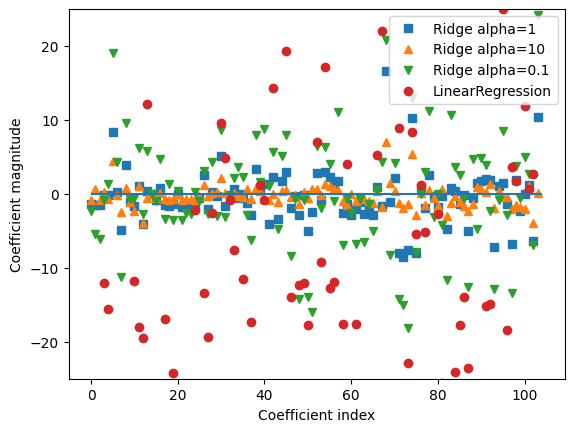

In [24]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

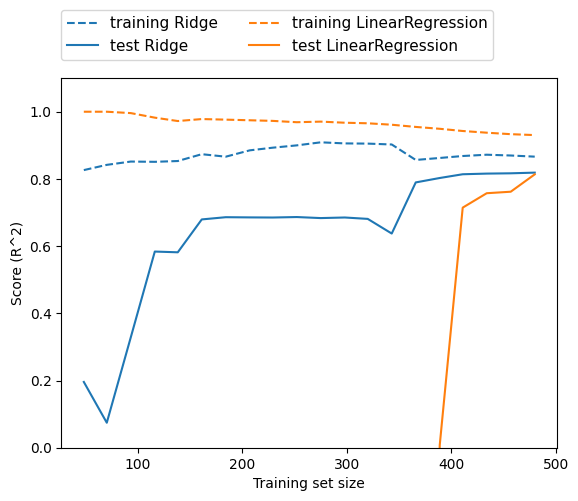

In [25]:
mglearn.plots.plot_ridge_n_samples()

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {: .2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {: .2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score:  0.29
Test set score:  0.21
Number of features used: 4


In [29]:
lasso001 = Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {: .2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {: .2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score:  0.90
Test set score:  0.77
Number of features used: 4


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {: .2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {: .2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feautes used: {}".format(np.sum(lasso00001.coef_ != 0) ))

Training set score:  0.95
Test set score:  0.64
Number of feautes used: 96


Text(0, 0.5, 'Coefficient magnitude')

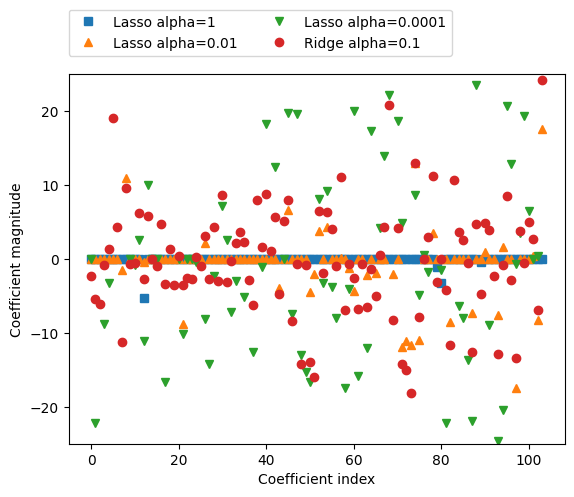

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

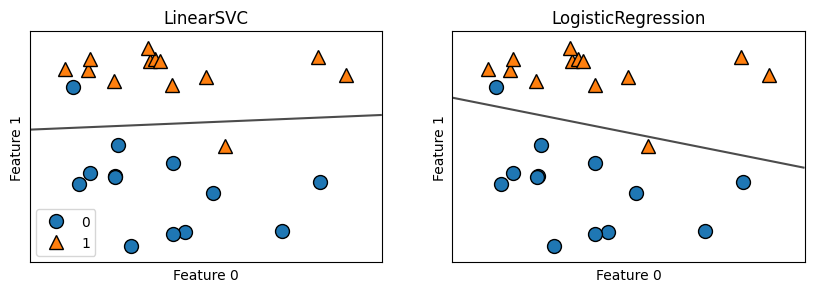

In [32]:
# Linear models for classification
# y = w[0] * x[0] + w[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
# Logistic Regression and Support Vector Machines (linear SVMs)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


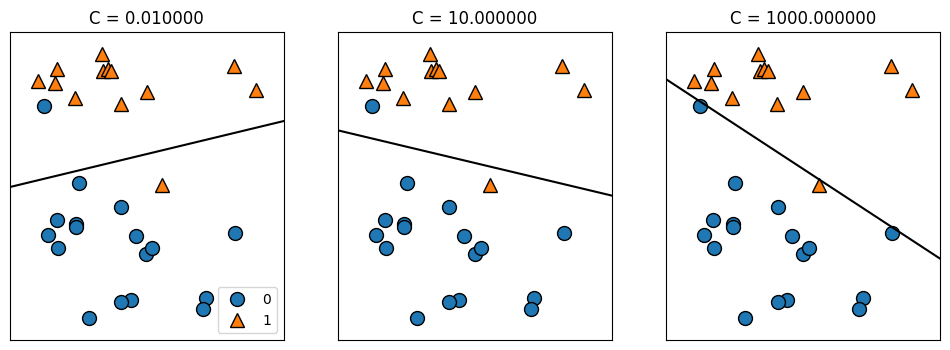

In [33]:
mglearn.plots.plot_linear_svc_regularization()

In [41]:
from sklearn.datasets import load_breast_cancer
bsc = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(bsc.data, bsc.target, stratify=bsc.target,random_state=42)

logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training test score: {: .3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {: .3f}".format(logreg.score(X_test, y_test)))

Training test score:  0.958
Test set score:  0.958


In [44]:
# Parameter C is the regularization parameter for classification for SVC and Log_regression
# c ~ 0, model optimizes and searches (coefficient vector) close to 0, high levels the model tries to fit the training set as close as possible 
# Let's use a more regularized model C = 0.1

logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {: .3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {: .3f}".format(logreg100.score(X_test, y_test)))

Training set score:  0.981
Test set score:  0.965


In [45]:
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {: .3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {: .3f}".format(logreg001.score(X_test, y_test)))

Training set score:  0.953
Test set score:  0.951


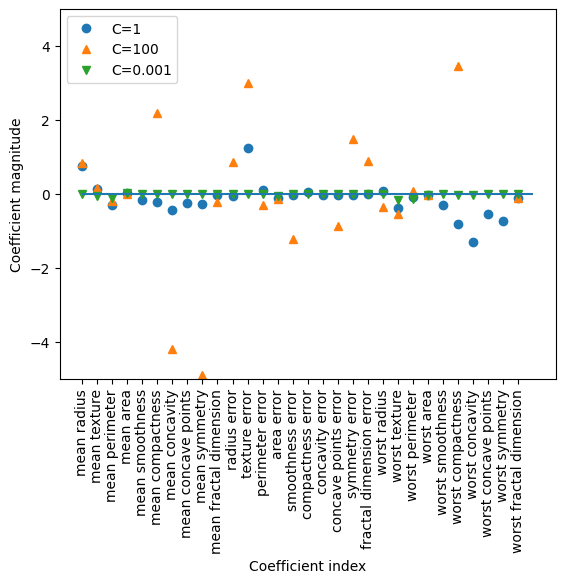

In [46]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(bsc.data.shape[1]), bsc.feature_names, rotation=90)
plt.hlines(0, 0, bsc.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C= 0.001:  0.91
Test accuracy of l1 logreg with C= 0.001:  0.92
Training accuracy of l1 logreg with C= 1.000:  0.96
Test accuracy of l1 logreg with C= 1.000:  0.96
Training accuracy of l1 logreg with C= 100.000:  0.99
Test accuracy of l1 logreg with C= 100.000:  0.98


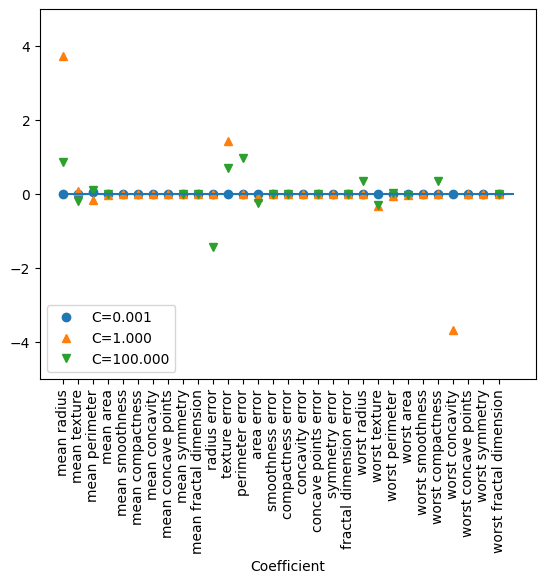

In [54]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(
        C=C, 
        l1_ratio=1, 
        solver="liblinear",
        max_iter=100000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={: .3f}: {: .2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={: .3f}: {: .2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(bsc.data.shape[1]), bsc.feature_names, rotation=90)
plt.hlines(0, 0, bsc.data.shape[1])
plt.xlabel("Coefficient index")
plt.xlabel("Coefficient")

plt.ylim(-5, 5)
plt.legend(loc=3)

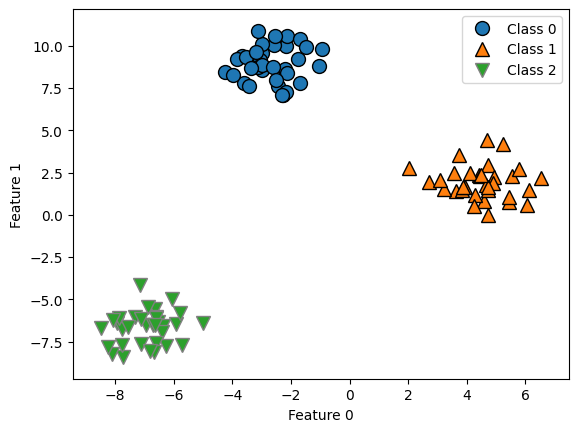

In [55]:
# Linear models for multiclass classification
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [56]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


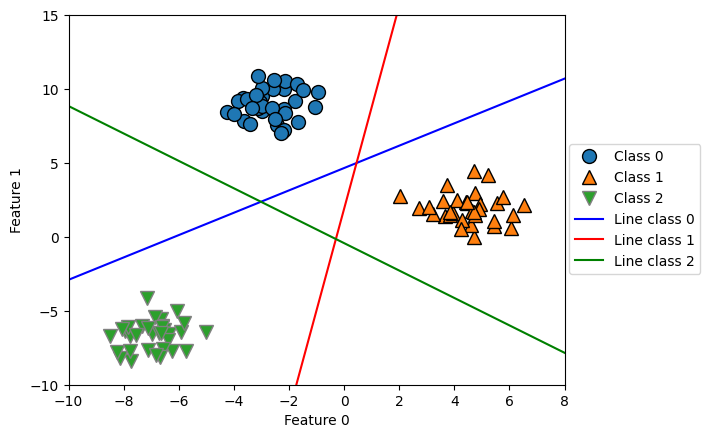

In [57]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

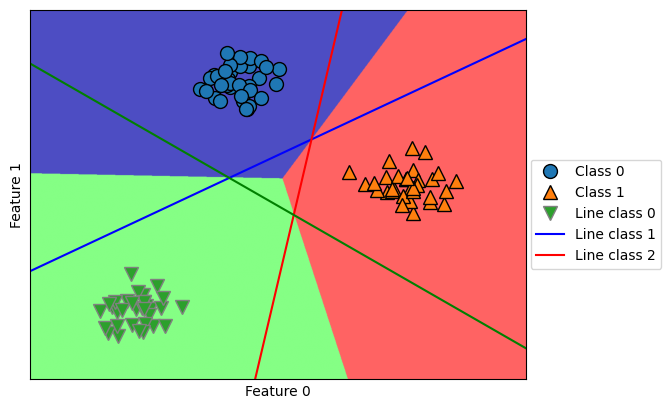

In [58]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
    plt.legend(['Class 0', 'Class 1', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


In [60]:
# Method Chaining

# instantiate model and fit it in one line
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

In [ ]:
# Fit and predict in the same line
logreg = LogisticRegression(max_iter=100000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [ ]:

# Model instantation, fitting, and predicting in one line
y_pred = LogisticRegression(max_iter=100000).fit(X_train, y_train).predict(X_test)